# Residual Learning

[He et. al (2015) ](https://arxiv.org/abs/1512.03385) proposed the residual learning framework to make training deep neural network easier. To thos end, they proposed the residual learning block as shown

$$ F(x)+x $$

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from net import Net
from gates import *
from optim import ADAM
from util import plot_images

(1797, 8, 8)
(1797, 1, 8, 8) (1797,)


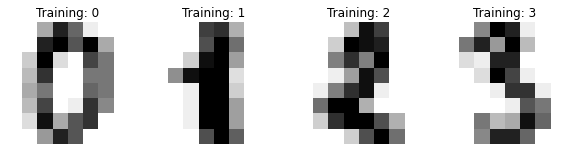

In [2]:
# Digit Recognition
digits = datasets.load_digits()
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    X=digits.images
y=digits.target
#Descritive stats; distribution of labels.
#print(np.histogram(y, density=True))
print(X.shape)

X_images=np.expand_dims(X, axis=1)
print(X_images.shape, y.shape)

# Let's demonstrate the residual learning framework

In [3]:
n=int(8*8)
num_labels=len(np.unique(y))
num_labels

10

In [4]:
# Model with 1 layer.
net=Net()
net.add_from_iter([Reshape(flatten=True),
                   Linear(in_features=64, out_features=num_labels),
                   Softmax()])
net.describe()
net.train(X,y,epoch=1000,print_out_per_epoch=100,batchsize=1024)

[1. layer] => Reshape: Flatten:True, OutShape: None
[2. layer] => Linear: W:(64, 10):Params. 650
[3. layer] => Softmax
Total param.:650
Training starts.
[Epoch:100]-[Avg.Loss:0.715]-[Avg.Acc:0.501]
[Epoch:200]-[Avg.Loss:0.480]-[Avg.Acc:0.523]
[Epoch:300]-[Avg.Loss:0.365]-[Avg.Acc:0.523]
[Epoch:400]-[Avg.Loss:0.281]-[Avg.Acc:0.533]
[Epoch:500]-[Avg.Loss:0.241]-[Avg.Acc:0.530]
[Epoch:600]-[Avg.Loss:0.218]-[Avg.Acc:0.529]
[Epoch:700]-[Avg.Loss:0.188]-[Avg.Acc:0.533]
[Epoch:800]-[Avg.Loss:0.169]-[Avg.Acc:0.538]
[Epoch:900]-[Avg.Loss:0.167]-[Avg.Acc:0.535]
[Epoch:1000]-[Avg.Loss:0.152]-[Avg.Acc:0.540]
[Elapsed time :1.990]


In [5]:
# Model with two layers.
net=Net()
net.add_from_iter([Reshape(flatten=True),
                   Linear(in_features=64, out_features=256),ReLU(),
                   Linear(in_features=256, out_features=num_labels),
                   Softmax()])
net.describe()
net.train(X,y,epoch=2000,print_out_per_epoch=500,batchsize=1024)

[1. layer] => Reshape: Flatten:True, OutShape: None
[2. layer] => Linear: W:(64, 256):Params. 16640
[3. layer] => ReLU
[4. layer] => Linear: W:(256, 10):Params. 2570
[5. layer] => Softmax
Total param.:19210
Training starts.
[Epoch:500]-[Avg.Loss:0.037]-[Avg.Acc:0.564]
[Epoch:1000]-[Avg.Loss:0.017]-[Avg.Acc:0.569]
[Epoch:1500]-[Avg.Loss:0.010]-[Avg.Acc:0.568]
[Epoch:2000]-[Avg.Loss:0.004]-[Avg.Acc:0.570]
[Elapsed time :23.874]


In [6]:
# Model with three layers.
net=Net()
net.add_from_iter([Reshape(flatten=True),
                   Linear(in_features=64, out_features=128),ReLU(),
                   Linear(in_features=128, out_features=256),ReLU(),
                   Linear(in_features=256, out_features=num_labels),
                   Softmax()])
net.describe()
net.train(X,y,epoch=2000,print_out_per_epoch=500,batchsize=1024)

[1. layer] => Reshape: Flatten:True, OutShape: None
[2. layer] => Linear: W:(64, 128):Params. 8320
[3. layer] => ReLU
[4. layer] => Linear: W:(128, 256):Params. 33024
[5. layer] => ReLU
[6. layer] => Linear: W:(256, 10):Params. 2570
[7. layer] => Softmax
Total param.:43914
Training starts.
[Epoch:500]-[Avg.Loss:0.074]-[Avg.Acc:0.550]
[Epoch:1000]-[Avg.Loss:0.023]-[Avg.Acc:0.565]
[Epoch:1500]-[Avg.Loss:0.009]-[Avg.Acc:0.570]
[Epoch:2000]-[Avg.Loss:0.004]-[Avg.Acc:0.570]
[Elapsed time :49.535]


In [7]:
# Model with four layers.
net=Net()
net.add_from_iter([Reshape(flatten=True),
                   Linear(in_features=64, out_features=128),BatchNorm(128),ReLU(),
                   Linear(in_features=128, out_features=256),BatchNorm(256),ReLU(),
                   Linear(in_features=256, out_features=num_labels),
                   Softmax()])
net.describe()
net.train(X,y,epoch=2000,print_out_per_epoch=500,batchsize=1024)

[1. layer] => Reshape: Flatten:True, OutShape: None
[2. layer] => Linear: W:(64, 128):Params. 8320
[3. layer] => Batch Norm.:epsilon:0.001, Param.256
[4. layer] => ReLU
[5. layer] => Linear: W:(128, 256):Params. 33024
[6. layer] => Batch Norm.:epsilon:0.001, Param.512
[7. layer] => ReLU
[8. layer] => Linear: W:(256, 10):Params. 2570
[9. layer] => Softmax
Total param.:44682
Training starts.
[Epoch:500]-[Avg.Loss:0.005]-[Avg.Acc:0.570]
[Epoch:1000]-[Avg.Loss:0.002]-[Avg.Acc:0.570]
[Epoch:1500]-[Avg.Loss:0.001]-[Avg.Acc:0.570]
[Epoch:2000]-[Avg.Loss:0.000]-[Avg.Acc:0.570]
[Elapsed time :105.753]


In [8]:
# As you can see

In [9]:
def benchmarking_with_fnn(X,y,num_hidden=64,num_labels=10,num_epoch=30,num_run=10,batchsize=256):
    
    loss=[]
    acc=[]
    for i in range(num_run):
        net=Net(optimizer=ADAM(),verbose=0)
        net.add_from_iter([Reshape(flatten=True),
                           Linear(in_features=num_hidden,out_features=num_labels),
                           Softmax()])
        net.train(X,y,epoch=num_epoch,batchsize=batchsize)
        acc.append(net.acc)
        loss.append(net.losses)

    net.describe()
    _, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 8))

    for l, ac in zip(loss, acc):
        axes[0].plot(ac)
        axes[0].set_title('Avg. Acc.')

        axes[1].plot(l)
        axes[1].set_title('Avg. Loss')
        


[1. layer] => Reshape: Flatten:True, OutShape: (256, 64)
[2. layer] => Linear: W:(64, 10):Params. 650
[3. layer] => Softmax
Total param.:650


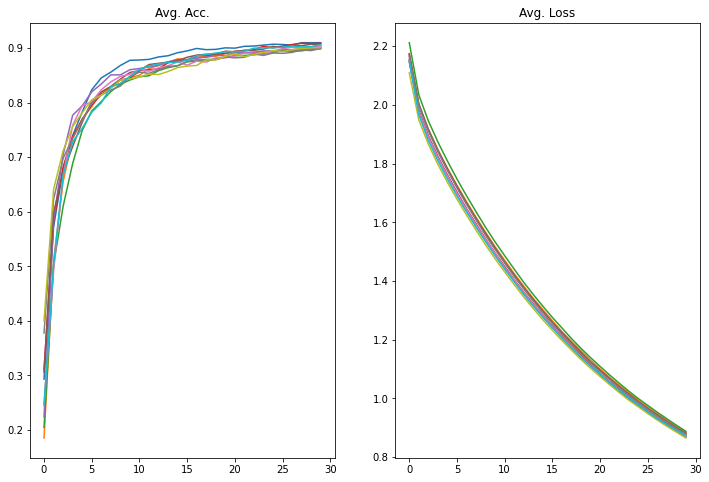

In [10]:
benchmarking_with_fnn(X=X,y=y,num_epoch=30,num_run=10,batchsize=256)

In [11]:
net=Net()
net.add_from_iter([Reshape(flatten=True),
                   Linear(in_features=64, out_features=256),BatchNorm(256),ReLU(),
                   Linear(in_features=256, out_features=num_labels),BatchNorm(num_labels),
                   Softmax()])
net.describe()
net.train(X,y,epoch=1000,print_out_per_epoch=100,batchsize=1024)

[1. layer] => Reshape: Flatten:True, OutShape: None
[2. layer] => Linear: W:(64, 256):Params. 16640
[3. layer] => Batch Norm.:epsilon:0.001, Param.512
[4. layer] => ReLU
[5. layer] => Linear: W:(256, 10):Params. 2570
[6. layer] => Batch Norm.:epsilon:0.001, Param.20
[7. layer] => Softmax
Total param.:19742
Training starts.
[Epoch:100]-[Avg.Loss:0.661]-[Avg.Acc:0.248]
[Epoch:200]-[Avg.Loss:0.603]-[Avg.Acc:0.274]
[Epoch:300]-[Avg.Loss:0.567]-[Avg.Acc:0.331]
[Epoch:400]-[Avg.Loss:0.537]-[Avg.Acc:0.391]
[Epoch:500]-[Avg.Loss:0.525]-[Avg.Acc:0.400]
[Epoch:600]-[Avg.Loss:0.504]-[Avg.Acc:0.454]
[Epoch:700]-[Avg.Loss:0.454]-[Avg.Acc:0.481]
[Epoch:800]-[Avg.Loss:0.456]-[Avg.Acc:0.481]
[Epoch:900]-[Avg.Loss:0.435]-[Avg.Acc:0.489]
[Epoch:1000]-[Avg.Loss:0.420]-[Avg.Acc:0.504]
[Elapsed time :33.725]


In [12]:
class ResidualBlock(Gate):
    def __init__(self,in_features=None,out_features=None,res_flow=None,identity_flow=None):
        super().__init__()
        if res_flow is None :
            self.a=[Linear(in_features, in_features), 
                    BatchNorm(in_features),
                    ReLU(),
                    Linear(in_features, out_features)]
        else:
            self.a=res_flow
        
        if identity_flow is None:
            self.b=[Linear(in_features, out_features)]    
        else:
            self.b=identity_flow
    @property
    def param_size(self):
        return sum([g.param_size for g in self.a+self.b])
    
    def __str__(self):
        return f'ResidualBlock {self.param_size}'
    
    def __iter__(self):
        for i in self.a+self.b:
            yield i
        
    def forward(self, X):
        """
        Parameters
        ----------
        X : shape=(N,in_features)
        Returns
        ----------
        Z:shape(N,out_features)
        """
        res_a= np.zeros(X.shape)+X 
        res_b= np.zeros(X.shape)+X
        for g in self.a:
            res_a=g.forward(res_a)
            
        for g in self.b:
            res_b=g.forward(res_b)
        return res_a+res_b
        
    def backward(self, dZ):
        """
        Parameters
        ----------
        dZ : shape=(N,out_features)
        ----------
        Returns
        -------
        dX : shape (N,in_features)
        """
        res_a  = np.ones(dZ.shape) *dZ
        res_b  = np.ones(dZ.shape) *dZ
        
        for g in reversed(self.a):
            res_a= g.backward(res_a)
        for g in reversed(self.b):
            res_b= g.backward(res_b)
        return res_a+res_b

In [13]:
net=Net()
net.add_from_iter([Reshape(flatten=True),
                   ResidualBlock(in_features=n,out_features=n//2),
                   ReLU(),
                   ResidualBlock(in_features=n//2,out_features=n//4),
                   ReLU(),
                   Linear(in_features=n//4, out_features=num_labels),
                   Softmax()])
net.describe()
net.train(X,y,epoch=50,print_out_per_epoch=10,batchsize=32)

[1. layer] => Reshape: Flatten:True, OutShape: None
[2. layer] => ResidualBlock 8448
[3. layer] => ReLU
[4. layer] => ResidualBlock 2176
[5. layer] => ReLU
[6. layer] => Linear: W:(16, 10):Params. 170
[7. layer] => Softmax
Total param.:10794
Training starts.
[Epoch:10]-[Avg.Loss:0.849]-[Avg.Acc:0.758]
[Epoch:20]-[Avg.Loss:0.607]-[Avg.Acc:0.886]
[Epoch:30]-[Avg.Loss:1.398]-[Avg.Acc:0.746]
[Epoch:40]-[Avg.Loss:0.967]-[Avg.Acc:0.815]
[Epoch:50]-[Avg.Loss:0.758]-[Avg.Acc:0.851]
[Elapsed time :13.728]


In [14]:
net=Net()
net.add_from_iter([Reshape(flatten=True),
                   ResidualBlock(in_features=n,out_features=n//4),
                   ReLU(),
                   Linear(in_features=n//4, out_features=num_labels),
                   Softmax()])
net.describe()
net.train(X,y,epoch=50,print_out_per_epoch=10,batchsize=32)

[1. layer] => Reshape: Flatten:True, OutShape: None
[2. layer] => ResidualBlock 6368
[3. layer] => ReLU
[4. layer] => Linear: W:(16, 10):Params. 170
[5. layer] => Softmax
Total param.:6538
Training starts.
[Epoch:10]-[Avg.Loss:0.388]-[Avg.Acc:0.950]
[Epoch:20]-[Avg.Loss:0.280]-[Avg.Acc:0.963]
[Epoch:30]-[Avg.Loss:0.270]-[Avg.Acc:0.965]
[Epoch:40]-[Avg.Loss:0.304]-[Avg.Acc:0.960]
[Epoch:50]-[Avg.Loss:0.422]-[Avg.Acc:0.915]
[Elapsed time :8.309]
